<a href="https://colab.research.google.com/github/Doodle-Aditya/Power-grid/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [4]:
df.sample(5)

,project_type,region,soil_type,terrain_type,state,project_name,start_date,planned_duration_months,voltage_kv,circuit_type,...,fuel_price_index,inflation_rate,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker,JCB
9273,Transmission Line,West,Black Cotton Soil,Plains,Gujarat,Burhanpur - Hindupur Transmission Line,2022-09-21,25,220,Multi Circuit,...,191.43,5.86,5343.49,488.33,21252,3622.5,0,0,0,5
76376,Transmission Line,West,Rocky,Mountainous,Gujarat,Alwar - Rewa Transmission Line,2017-03-01,27,220,Double Circuit,...,137.62,3.63,13682.64,637.27,27984,7632.0,0,0,0,9
55573,Transmission Line,East,Sandy,Hilly,Jharkhand,Jharkhand Trans Interconnector,2002-07-19,24,220,Single Circuit,...,106.58,4.83,17348.66,341.72,15048,10670.4,0,0,0,4
22475,Transmission Line,South,Sandy,Coastal,Karnataka,Noida - Uluberia Transmission Line,2019-08-17,26,400,Double Circuit,...,135.59,6.38,28443.41,1123.73,53880,9698.4,0,0,0,3
44091,Transmission Line,South,Black Cotton Soil,Plains,Karnataka,Hospet - Nadiad Transmission Line,2004-03-07,18,400,Single Circuit,...,95.62,5.56,26434.15,696.60,25440,9540.0,0,0,0,4


In [5]:
df.describe()

,planned_duration_months,voltage_kv,Length_km,num_towers,steel_price_index,conductor_price_index,fuel_price_index,inflation_rate,steel_tonnes,conductor_km,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker,JCB
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,22.637100,377.012440,73.912955,295.361440,100.610188,95.787081,134.851130,5.510381,14652.979365,646.501943,2.498437e+04,6385.218148,0.400800,2.605850,8.424500,4.360570
std,9.608165,221.565497,107.101491,435.067035,13.821017,8.649212,29.264652,1.482330,26105.754237,1289.858136,5.106683e+04,8239.125210,0.801265,3.865965,12.540536,2.099272
min,6.000000,132.000000,0.000000,0.000000,80.000000,85.000000,70.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,15.000000,220.000000,0.000000,0.000000,89.880000,88.220000,114.590000,4.500000,0.000000,0.000000,0.000000e+00,1918.800000,0.000000,0.000000,0.000000,3.000000
50%,21.000000,400.000000,41.310000,161.000000,99.990000,94.940000,134.780000,5.510000,5817.725000,225.625000,7.999000e+03,3958.775000,0.000000,0.000000,0.000000,4.000000
75%,28.000000,400.000000,105.950000,420.000000,110.110000,101.700000,155.180000,6.520000,18597.165000,754.452500,2.871000e+04,7854.000000,0.000000,5.000000,16.000000,6.000000
max,48.000000,800.000000,1200.000000,5929.000000,160.000000,137.070000,200.000000,10.000000,605138.400000,34856.060000,1.434375e+06,155547.000000,3.000000,12.000000,40.000000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   project_type             100000 non-null  object 
 1   region                   100000 non-null  object 
 2   soil_type                100000 non-null  object 
 3   terrain_type             100000 non-null  object 
 4   state                    100000 non-null  object 
 5   project_name             100000 non-null  object 
 6   start_date               100000 non-null  object 
 7   planned_duration_months  100000 non-null  int64  
 8   voltage_kv               100000 non-null  int64  
 9   circuit_type             100000 non-null  object 
 10  conductor_type           100000 non-null  object 
 11  Length_km                100000 non-null  float64
 12  num_towers               100000 non-null  int64  
 13  steel_price_index        100000 non-null  float64
 14  condu

In [7]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [10]:
df['year'] = df['start_date'].dt.year

In [11]:
df['month'] = df['start_date'].dt.month

In [12]:
df['quarter'] = df['start_date'].dt.quarter

In [13]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['season'] = df['month'].apply(get_season)


In [14]:
df.sample(5)

,project_type,region,soil_type,terrain_type,state,project_name,start_date,planned_duration_months,voltage_kv,circuit_type,...,insulators_unit,concrete_cubic_meter,Bus_reactor,Transformers,circuit_breaker,JCB,year,month,quarter,season
26034,Transmission Line,West,Sandy,Mountainous,Rajasthan,Nandyal - Faridabad Transmission Line,2015-11-26,33,400,Multi Circuit,...,37680,4239.00,0,0,0,8,2015,11,4,Post-Monsoon
70287,Transmission Line,North,Sandy,Mountainous,Haryana,Rampur - Adoni Transmission Line,2016-09-03,24,132,Multi Circuit,...,16394,5589.00,0,0,0,6,2016,9,3,Post-Monsoon
9366,Transmission Line,North,Clayey,Plains,Haryana,Kakinada - Vadodara Transmission Line,2010-03-11,13,400,Double Circuit,...,82440,11335.50,0,0,0,2,2010,3,1,Summer
14141,Substation,North-East,Clayey,Plains,Manipur,Manipur Indo Expansion,2003-03-08,14,400,Double Circuit,...,0,2532.30,1,1,21,5,2003,3,1,Summer
41866,Substation,South,Clayey,Plains,Karnataka,Karnataka Maha Expansion,2025-09-16,17,400,Single Circuit,...,0,2056.06,0,6,13,5,2025,9,3,Post-Monsoon


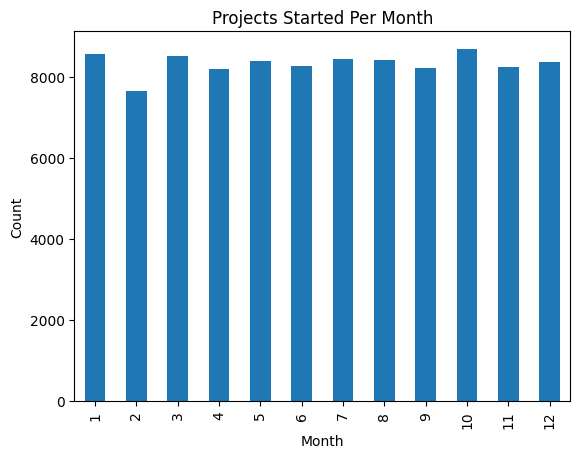

In [15]:
df['month'].value_counts().sort_index().plot(kind='bar')
plt.title("Projects Started Per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

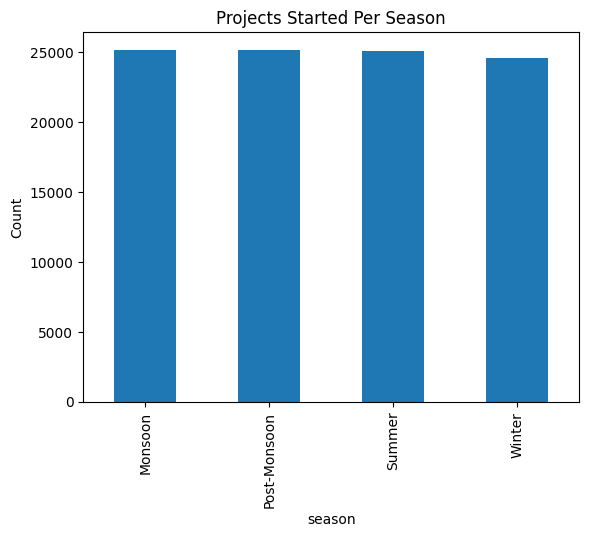

In [16]:
df['season'].value_counts().sort_index().plot(kind='bar')
plt.title("Projects Started Per Season")
plt.xlabel("season")
plt.ylabel("Count")
plt.show()

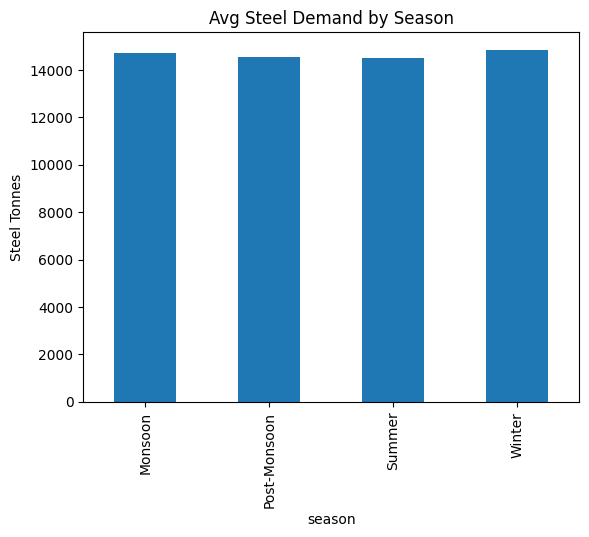

In [17]:
df.groupby('season')['steel_tonnes'].mean().plot(kind='bar')
plt.title("Avg Steel Demand by Season")
plt.ylabel("Steel Tonnes")
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   project_type             100000 non-null  object        
 1   region                   100000 non-null  object        
 2   soil_type                100000 non-null  object        
 3   terrain_type             100000 non-null  object        
 4   state                    100000 non-null  object        
 5   project_name             100000 non-null  object        
 6   start_date               100000 non-null  datetime64[ns]
 7   planned_duration_months  100000 non-null  int64         
 8   voltage_kv               100000 non-null  int64         
 9   circuit_type             100000 non-null  object        
 10  conductor_type           100000 non-null  object        
 11  Length_km                100000 non-null  float64       
 12  num_towers       

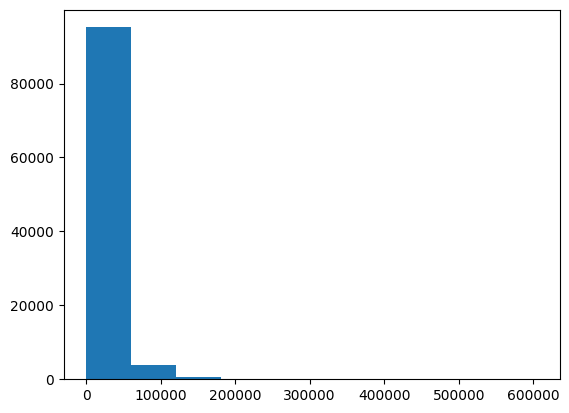

In [19]:
plt.hist(df['steel_tonnes'])
plt.show()

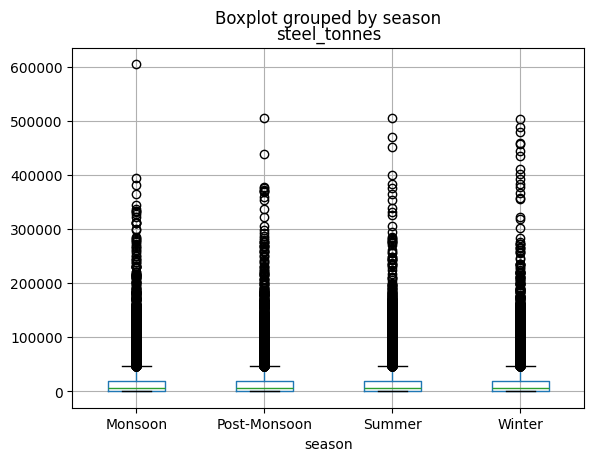

In [20]:
df.boxplot(column='steel_tonnes', by='season')
plt.show()

In [22]:
import pandas as pd

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)


Numeric: Index(['planned_duration_months', 'voltage_kv', 'Length_km', 'num_towers',
       'steel_price_index', 'conductor_price_index', 'fuel_price_index',
       'inflation_rate', 'steel_tonnes', 'conductor_km', 'insulators_unit',
       'concrete_cubic_meter', 'Bus_reactor', 'Transformers',
       'circuit_breaker', 'JCB'],
      dtype='object')
Categorical: Index(['project_type', 'region', 'soil_type', 'terrain_type', 'state',
       'project_name', 'circuit_type', 'conductor_type', 'season'],
      dtype='object')


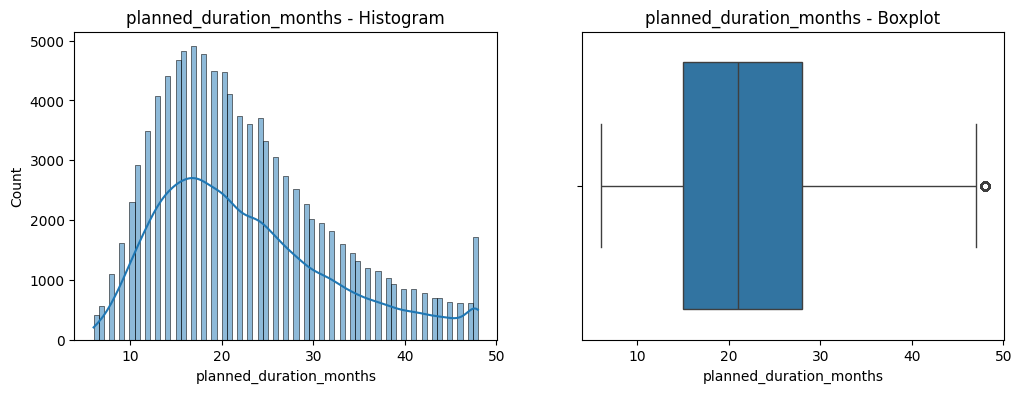

Skewness of planned_duration_months: 0.7669588910406011
--------------------------------------------------


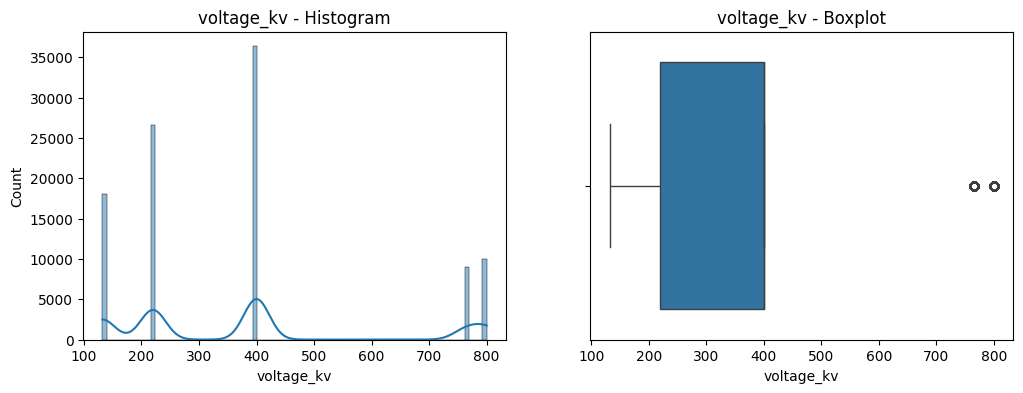

Skewness of voltage_kv: 0.8451799906345838
--------------------------------------------------


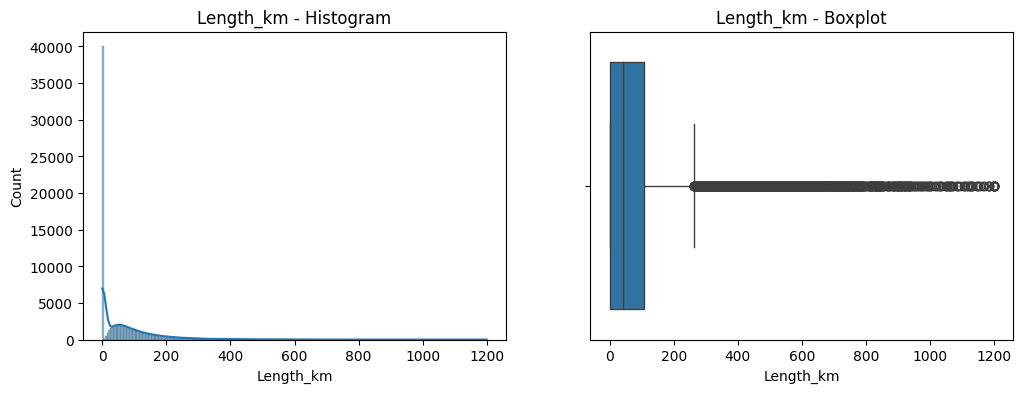

Skewness of Length_km: 3.075541994238143
--------------------------------------------------


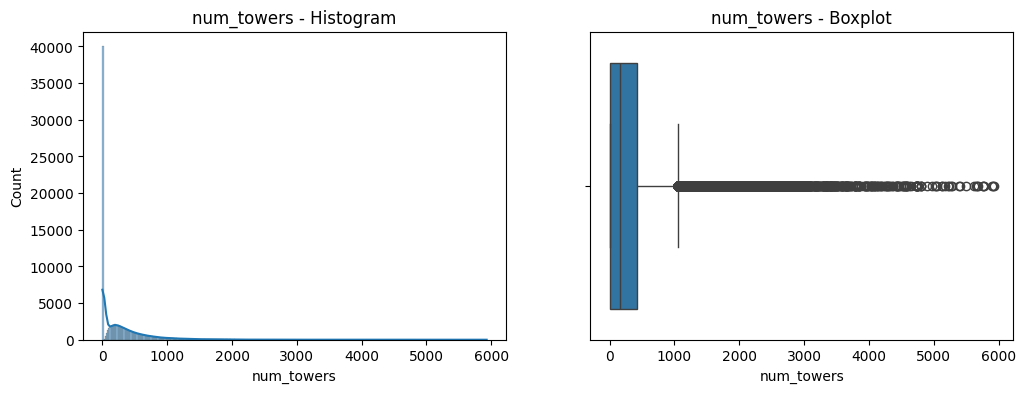

Skewness of num_towers: 3.233623645119071
--------------------------------------------------


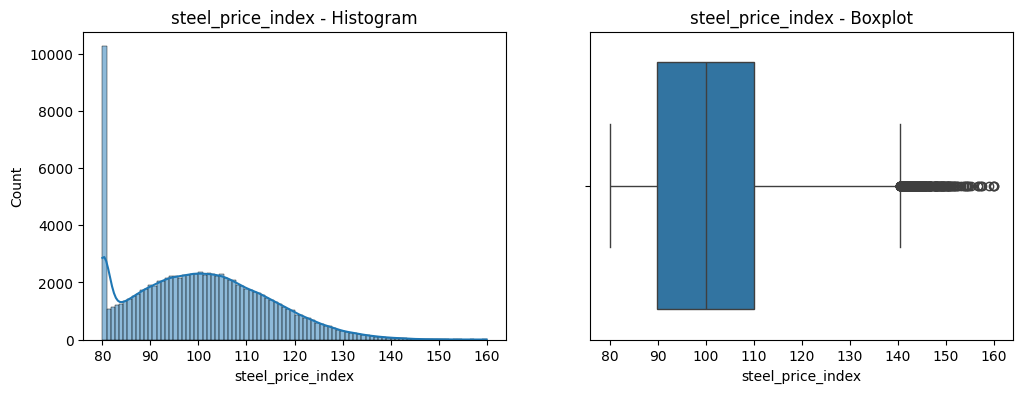

Skewness of steel_price_index: 0.36767194276002235
--------------------------------------------------


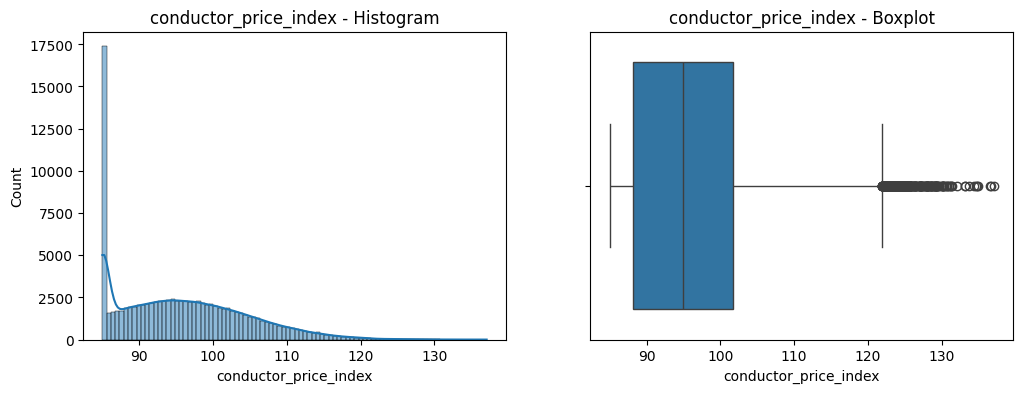

Skewness of conductor_price_index: 0.58620576670343
--------------------------------------------------


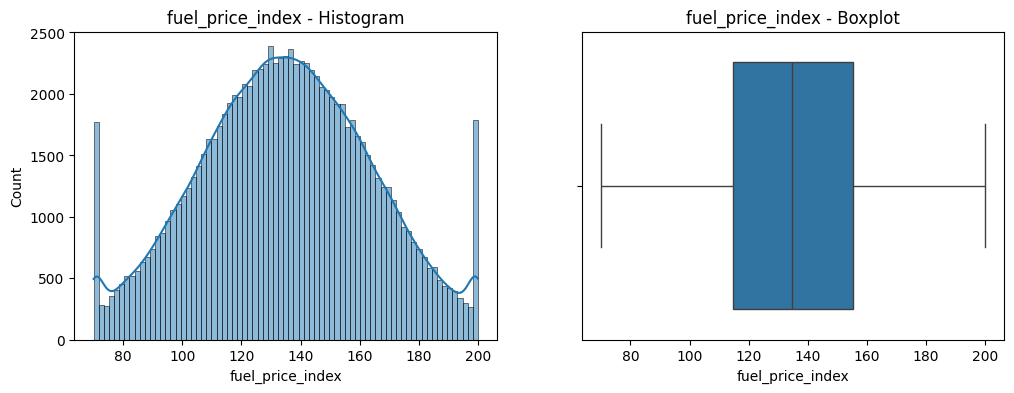

Skewness of fuel_price_index: 0.0032271209721117496
--------------------------------------------------


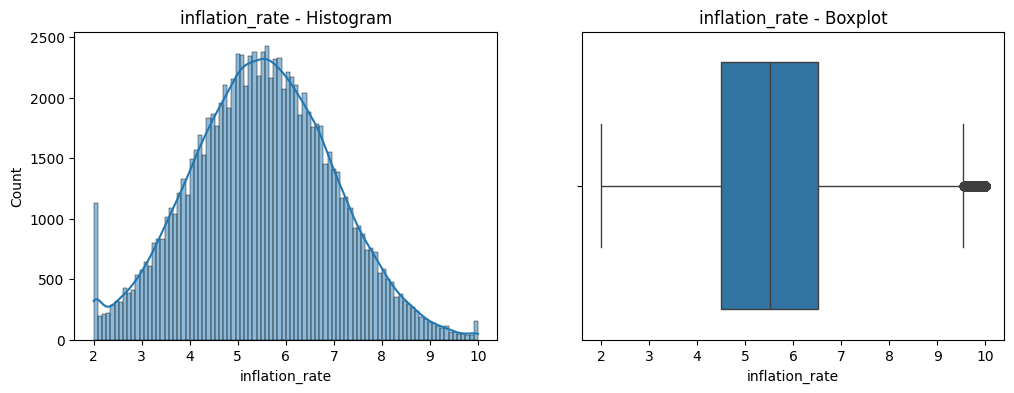

Skewness of inflation_rate: 0.04777148003665879
--------------------------------------------------


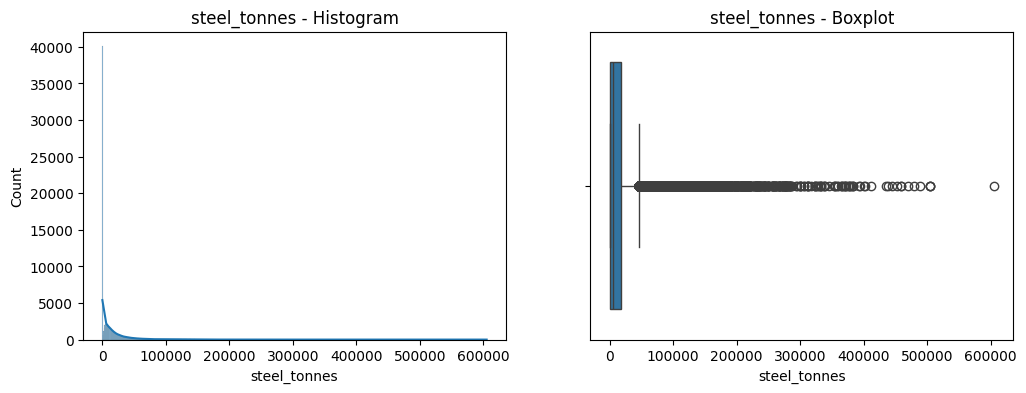

Skewness of steel_tonnes: 4.840678853285488
--------------------------------------------------


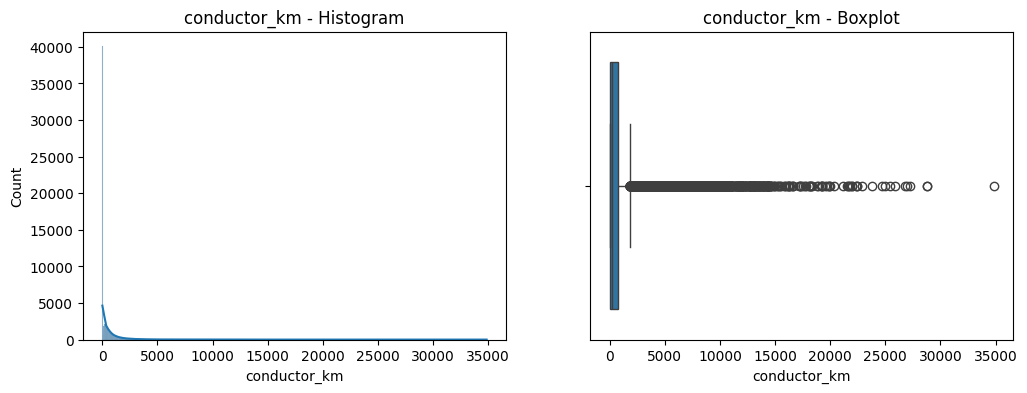

Skewness of conductor_km: 5.890035486461028
--------------------------------------------------


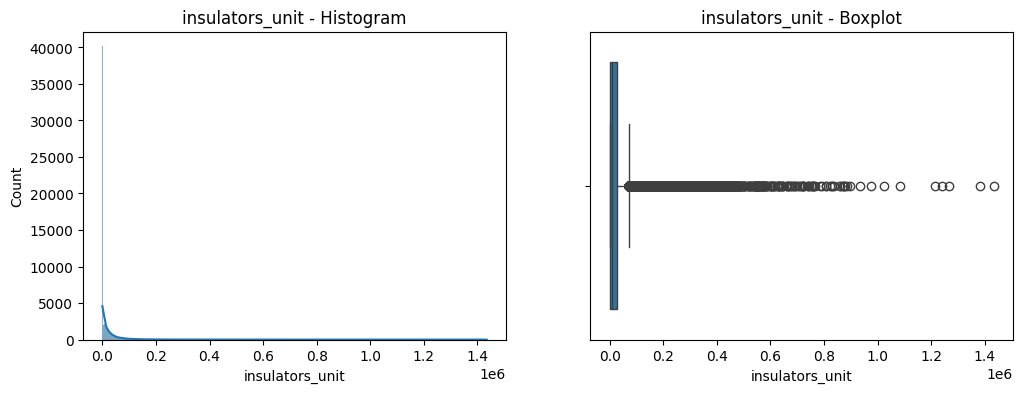

Skewness of insulators_unit: 6.092880823867936
--------------------------------------------------


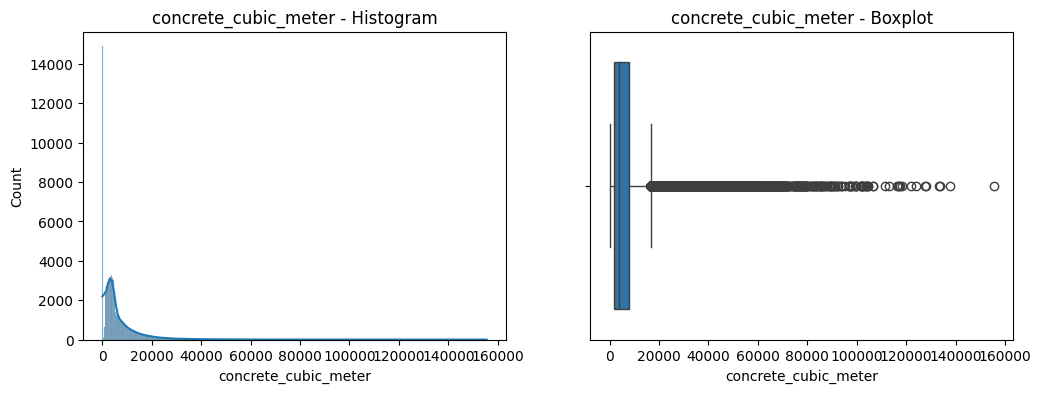

Skewness of concrete_cubic_meter: 3.854491206214562
--------------------------------------------------


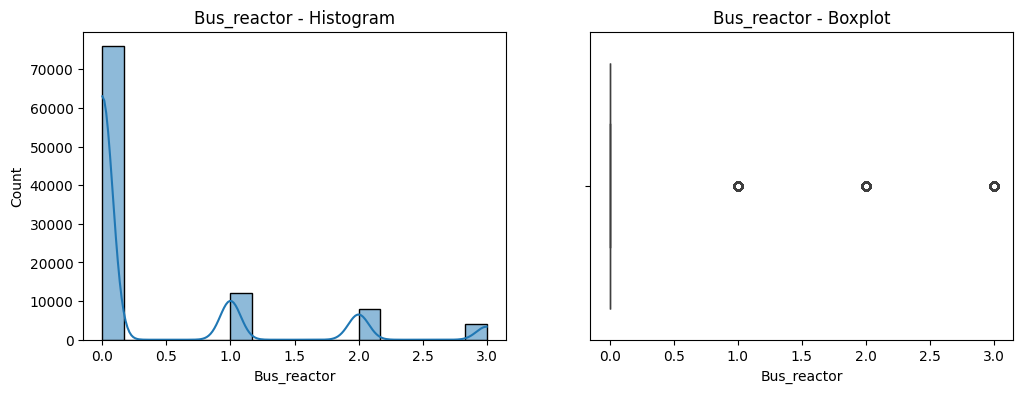

Skewness of Bus_reactor: 1.9721943729428568
--------------------------------------------------


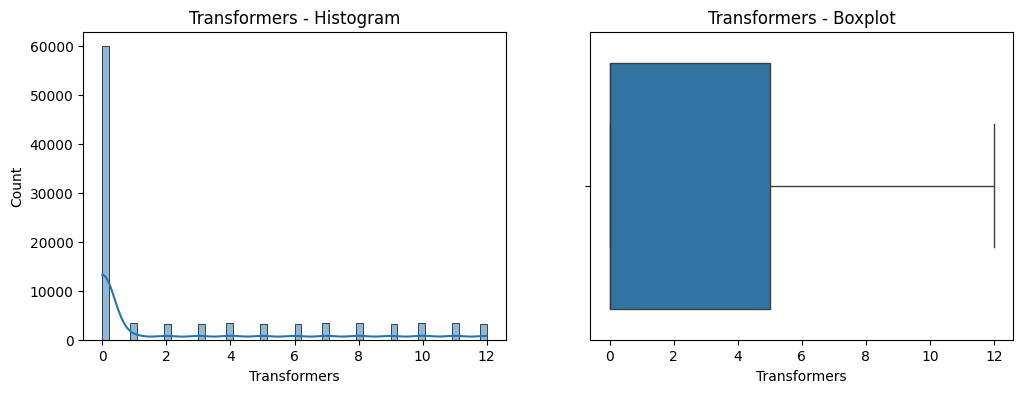

Skewness of Transformers: 1.1937196739707128
--------------------------------------------------


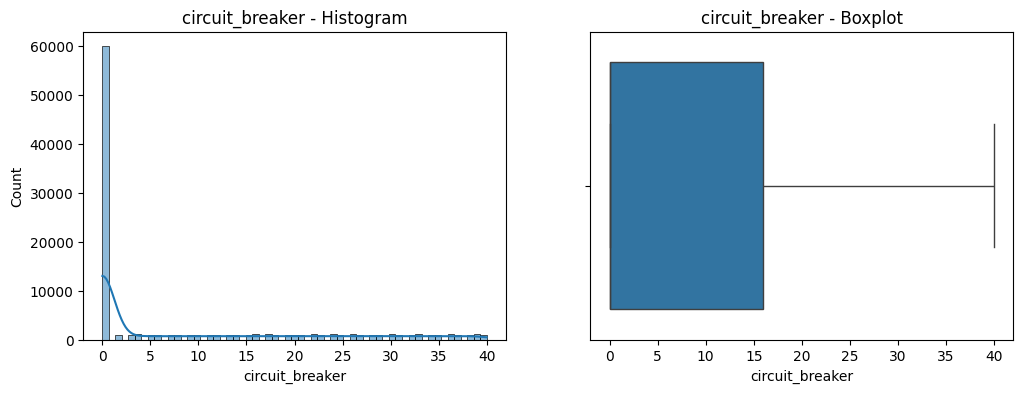

Skewness of circuit_breaker: 1.2016152650475875
--------------------------------------------------


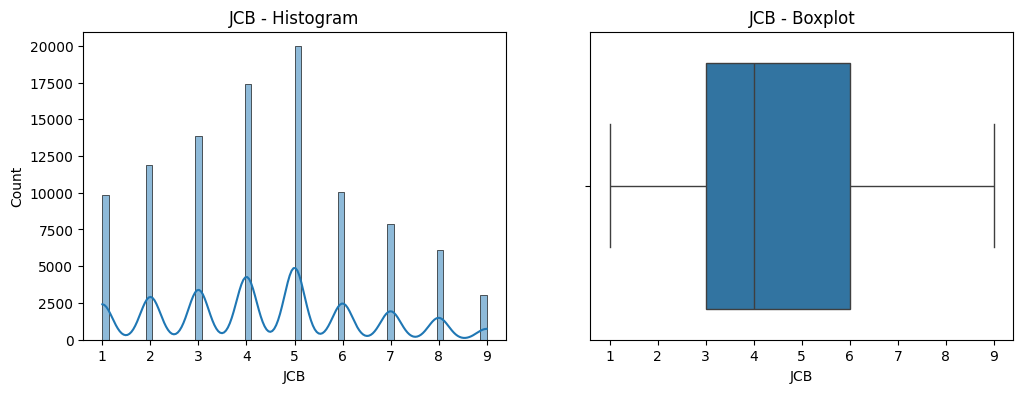

Skewness of JCB: 0.24196539515131354
--------------------------------------------------


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} - Histogram")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")

    plt.show()

    # Skewness
    print(f"Skewness of {col}:", df[col].skew())
    print("-"*50)


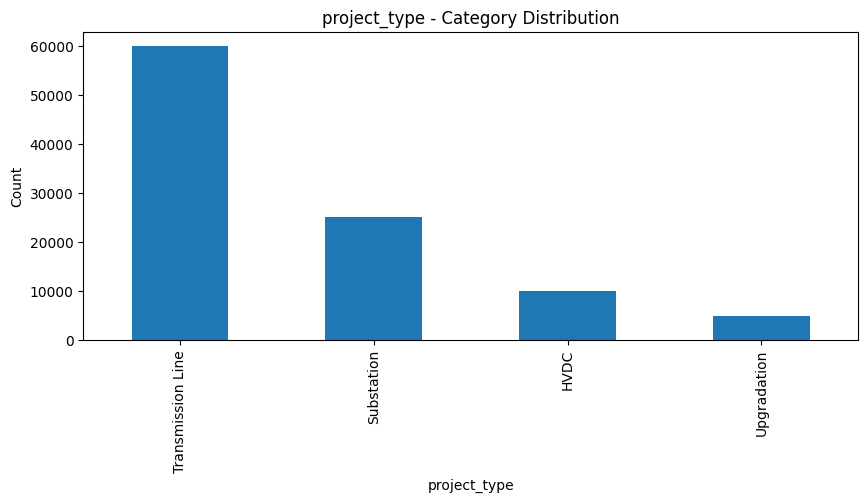

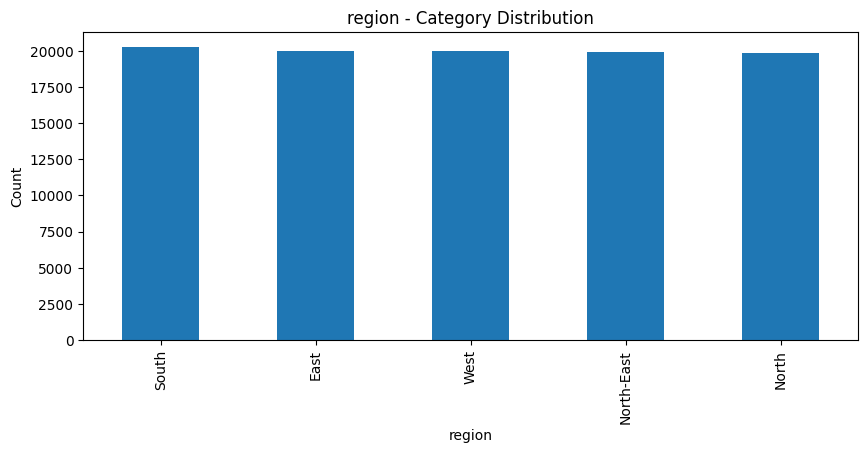

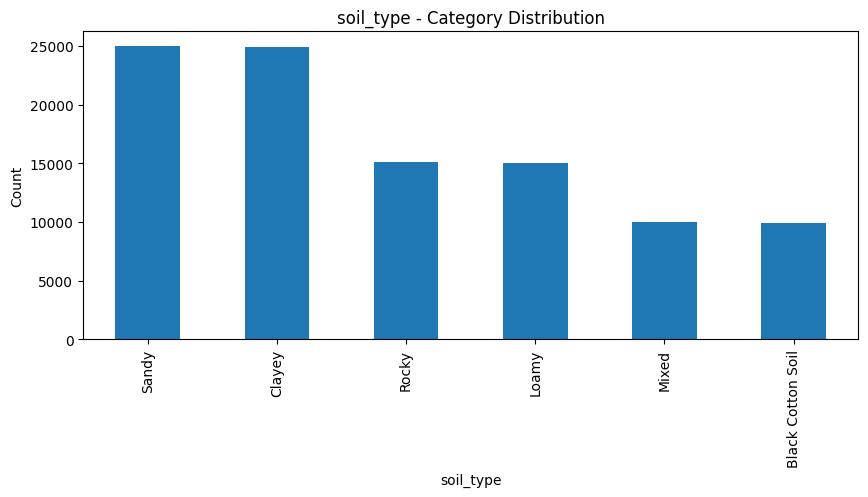

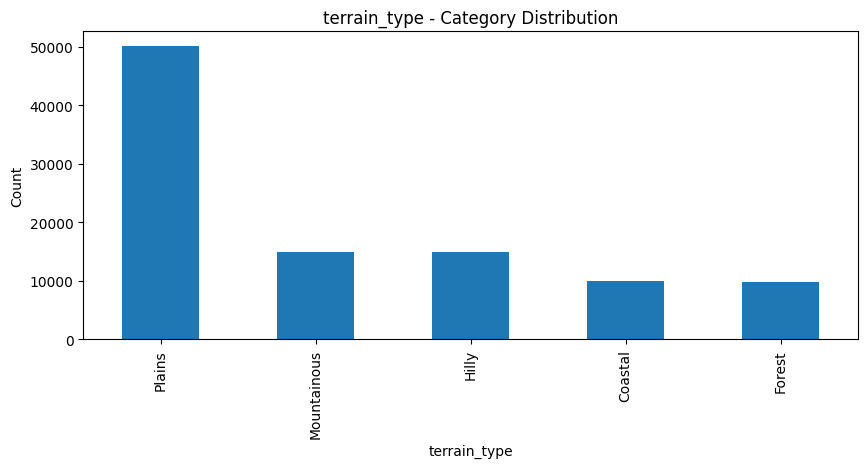

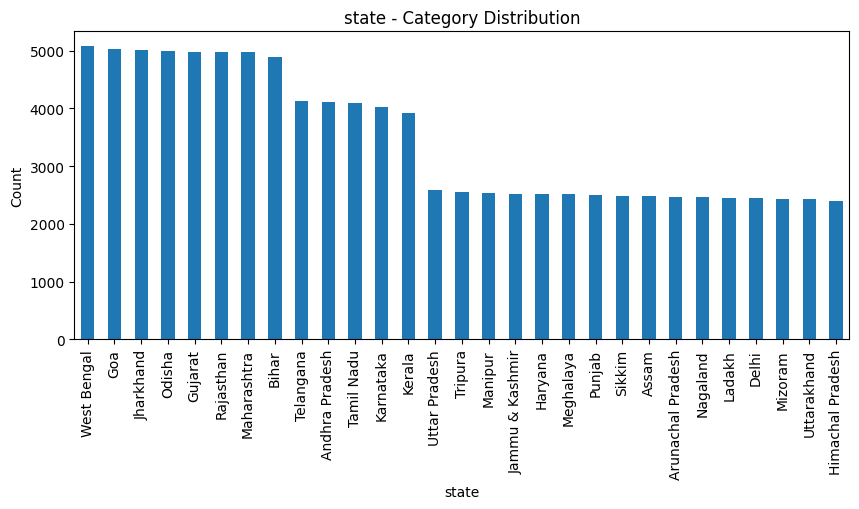

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} - Category Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
